# Web-Sraping_Roshni
# Deliverable 2: Scrape and Analyze Mars Weather Data

In [34]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [36]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [37]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [38]:
# Extract all rows of data

# Find the table element
table = soup.find('table')

# Find all rows in the table
rows = table.find_all('tr')

# Print the number of rows to confirm success
print(len(rows))


1868


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [39]:
# Create an empty list
data_rows = []

# Loop through the scraped data to create a list of rows
for row in rows:
    # Extract data from each row (assuming the data is in the correct order)
    cells = row.find_all('td')
    if len(cells) == 7:  # Check if there are 7 cells in the row (as expected)
        # Extract data from each cell
        id_ = cells[0].text.strip()
        terrestrial_date = cells[1].text.strip()
        sol = cells[2].text.strip()
        ls = cells[3].text.strip()
        month = cells[4].text.strip()
        min_temp = cells[5].text.strip()
        pressure = cells[6].text.strip()
        
        # Append the extracted data as a dictionary to the list of rows
        data_rows.append({
            'id': id_,
            'terrestrial_date': terrestrial_date,
            'sol': sol,
            'ls': ls,
            'month': month,
            'min_temp': min_temp,
            'pressure': pressure
        })

# Print the number of rows to confirm success
print(len(data_rows))

1867


In [40]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Import Pandas
import pandas as pd

# List of column names
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Create a Pandas DataFrame using the list of rows and column names
df = pd.DataFrame(data_rows, columns=column_names)

# Display the DataFrame
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [41]:
# Confirm DataFrame was created successfully
print(df)

# Display summary information about the DataFrame
df.info()

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id              

### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [42]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [43]:
# Change data types for data analysis

# Convert 'terrestrial_date' to datetime
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Convert 'sol' and 'month' to int
df['sol'] = df['sol'].astype(int)
df['month'] = df['month'].astype(int)

# Convert 'min_temp' and 'pressure' to float
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

In [44]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                          object
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [45]:
# 1. How many months are there on Mars?
# Find the number of unique months
num_months = df['month'].nunique()
print("Number of months exist on Mars:", num_months)

Number of months exist on Mars: 12


In [46]:
# 2. How many Martian(and not earth) days' worth of data exist in the scraped dataset are there?
# Find the number of unique sols
num_sols = df['sol'].nunique()
print("Number of Martian days worth of data:", num_sols)

Number of Martian days worth of data: 1867


In [47]:
# 3. What is the average low temperature by month?
# Calculate the average minimum daily temperature for each month
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()
avg_min_temp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

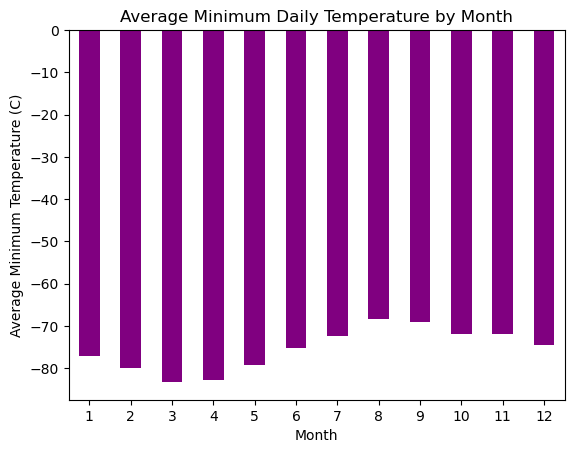

In [48]:
# Plot the average temperature by month
# Plot the results as a bar chart
avg_min_temp_by_month.plot(kind='bar', color='purple', xlabel='Month', ylabel='Average Minimum Temperature (C)', title='Average Minimum Daily Temperature by Month')
plt.xticks(rotation=0)
plt.show()

In [49]:
# Identify the coldest and hottest months in Curiosity's location

# Calculate the average minimum daily temperature for each month
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Identify the coldest and hottest months
coldest_month = avg_min_temp_by_month.idxmin()  # Get the index of the month with the lowest average temperature
hottest_month = avg_min_temp_by_month.idxmax()  # Get the index of the month with the highest average temperature

# Print the results
print("Coldest month:", coldest_month)
print("Hottest month:", hottest_month)

Coldest month: 3
Hottest month: 8


In [50]:
# 4. Average pressure by Martian month
# Calculate the average atmospheric pressure for each Martian month
avg_pressure_by_month = df.groupby('month')['pressure'].mean()

# Print the result
avg_pressure_by_month


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

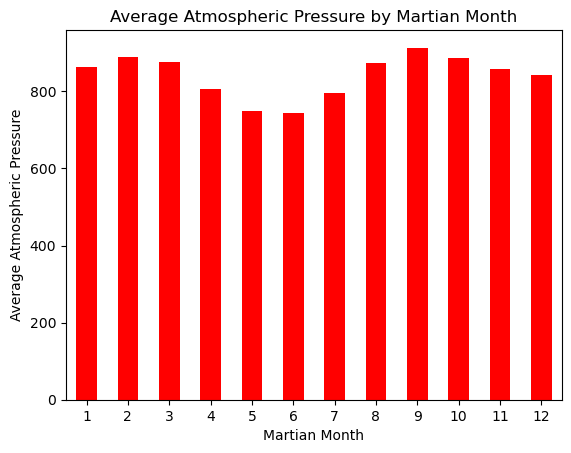

In [51]:

# Plot the average atmospheric pressure by Martian month
avg_pressure_by_month.plot(kind='bar',color='red', xlabel='Martian Month', ylabel='Average Atmospheric Pressure', title='Average Atmospheric Pressure by Martian Month')
plt.xticks(rotation=0)
plt.show()

In [52]:

# Identify the month with the lowest average atmospheric pressure
lowest_pressure_month = avg_pressure_by_month.idxmin()

# Identify the month with the highest average atmospheric pressure
highest_pressure_month = avg_pressure_by_month.idxmax()

# Print the results
print("Month with the lowest atmospheric pressure:", lowest_pressure_month)
print("Month with the highest atmospheric pressure:", highest_pressure_month)

Month with the lowest atmospheric pressure: 6
Month with the highest atmospheric pressure: 9


In [53]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Orbital periods in days
martian_year_days = 687
earth_year_days = 365.25

# Calculate the number of terrestrial days in a Martian year
terrestrial_days_in_martian_year = martian_year_days / earth_year_days
print("Number of terrestrial days in a Martian year:", terrestrial_days_in_martian_year)

Number of terrestrial days in a Martian year: 1.8809034907597535


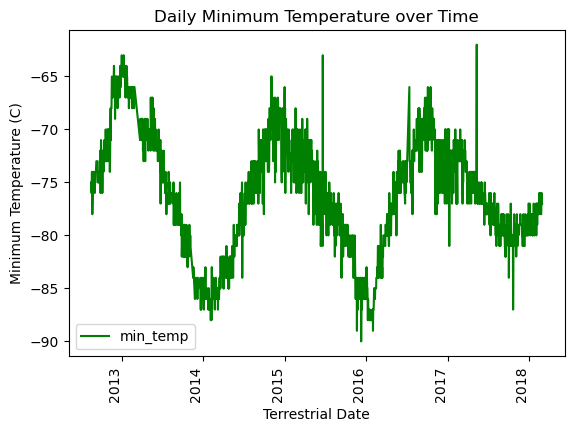

In [54]:
# Plot the daily minimum temperature over time
df.plot(x='terrestrial_date', y='min_temp', xlabel='Terrestrial Date', ylabel='Minimum Temperature (C)', title='Daily Minimum Temperature over Time', color='green')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.show()

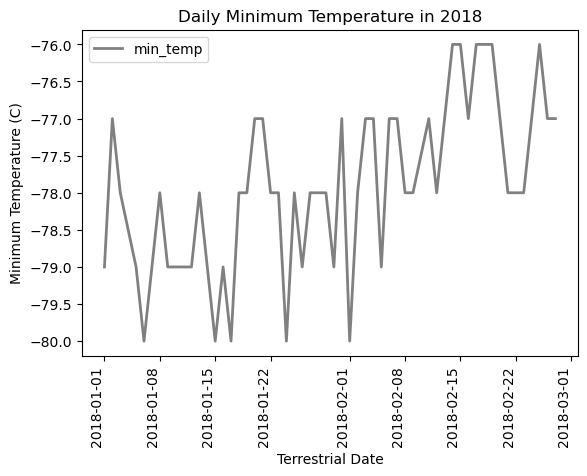

In [55]:
# Filter the DataFrame to include only the data for the year 2018
df_2018 = df[df['terrestrial_date'].dt.year == 2018]

# Plot the daily minimum temperature over time for the year 2018 with a smooth line and rotated x-axis labels
df_2018.plot(x='terrestrial_date', y='min_temp', xlabel='Terrestrial Date', ylabel='Minimum Temperature (C)', title='Daily Minimum Temperature in 2018', rot=90, kind='line', color='gray', linewidth=2)
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [56]:
# Write the data to a CSV
df.to_csv('mars_weather_data_Roshni.csv', index=False)


In [57]:
browser.quit()